In [1]:
#Gradient Boosting
#Regression

import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
m = 200
x = np.random.rand(m,1)
y = 4 * (x[:, 0] - 0.5)**2 + np.random.randn(m)/10

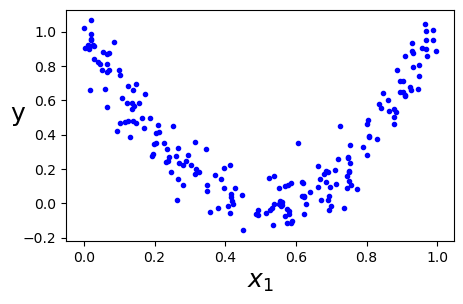

In [3]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('y', fontsize=18, rotation=0)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [5]:
#GradientBoostingRegressor()

from sklearn.ensemble import GradientBoostingRegressor

gbReg = GradientBoostingRegressor(max_depth=2, n_estimators=20, random_state=1)

gbReg.fit(xTrain, yTrain)
gbReg.score(xTrain, yTrain)

0.881711350375725

In [6]:
gbReg.score(xTest, yTest)

0.8616616654025059

In [7]:
#Model

def plotRegressionPredictions(model, x, y, axes=[0, 1, -0.2, 1]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1,1)
    yPred = model.predict(x1)
    
    plt.plot(x, y, 'b.')
    plt.plot(x1, yPred, 'r-', linewidth=2, label='$\hat{y}$')
    
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('y', fontsize=18, rotation=0)
    plt.legend(loc='upper center', fontsize=14)

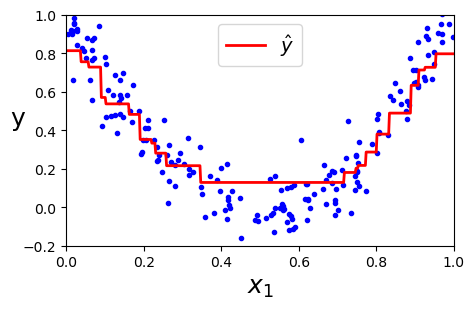

In [8]:
plt.figure(figsize=(5, 3))
plotRegressionPredictions(gbReg, x, y)
plt.show()

In [9]:
#Early Stopping

from sklearn.metrics import mean_squared_error

gbReg = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=1)

gbReg.fit(xTrain, yTrain)

mses = [mean_squared_error(yTest, yPred) for yPred in gbReg.staged_predict(xTest)]

bestnEstimators = np.argmin(mses) + 1
bestnEstimators

80

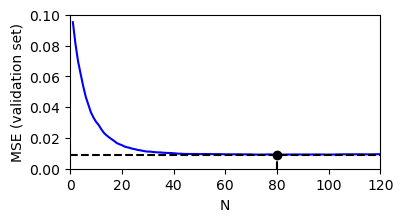

In [10]:
minMse = np.min(mses)

plt.figure(figsize=(4, 2))
plt.plot(range(1, 121), mses, 'b-')
plt.plot(bestnEstimators, minMse, 'ko')
plt.plot([bestnEstimators, bestnEstimators], [0, minMse], 'k--')
plt.plot([0, 120], [minMse, minMse], 'k--')
plt.axis([0, 120, 0, .1])
plt.xlabel('N')
plt.ylabel('MSE (validation set)')
plt.show()

In [11]:
gbRegBest = GradientBoostingRegressor(max_depth=2, n_estimators=bestnEstimators, random_state=1)

gbRegBest.fit(xTrain, yTrain)
gbRegBest.score(xTest, yTest)

0.9175041453821575

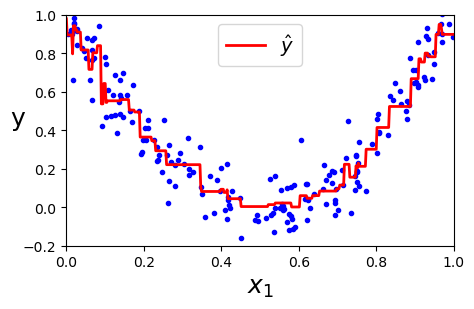

In [12]:
plt.figure(figsize=(5, 3))
plotRegressionPredictions(gbRegBest, x, y)
plt.show()

In [13]:
#Classification

from sklearn.datasets import make_moons
x, y = make_moons(n_samples=500, noise=.3, random_state=2)

In [14]:
def plotDataset(x, y, axes):
    plt.plot(x[y==0, 0], x[y==0 ,1], 'ro', markersize=3)
    plt.plot(x[y==1, 0], x[y==1, 1], 'g^', markersize=3)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$x_2$', fontsize=18, rotation=0)

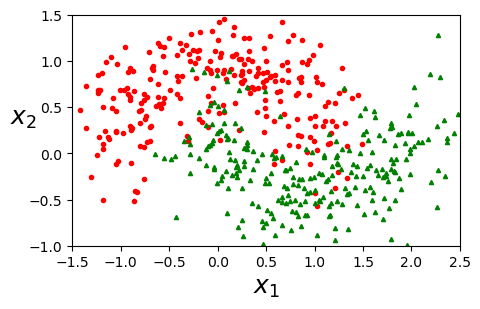

In [15]:
plt.figure(figsize=(5, 3))
plotDataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=1)

In [17]:
#GradientBoostingClassifier()

from sklearn.ensemble import GradientBoostingClassifier

gbClf = GradientBoostingClassifier(n_estimators=1000, random_state=1)

In [18]:
gbClf.fit(xTrain, yTrain)
gbClf.score(xTrain, yTrain)

1.0

In [19]:
gbClf.score(xTest, yTest)

0.856

In [20]:
def plotDecisionBoundary(clf, x, y, axes=[-1.5, 2.45, -1, 1.5]):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    xNew = np.c_[x1.ravel(), x2.ravel()]
    yPred = clf.predict(xNew).reshape(x1.shape)
    
    plt.contourf(x1, x2, yPred, alpha=.2)
    plt.contour(x1, x2, yPred)
    
    plotDataset(x, y, axes)

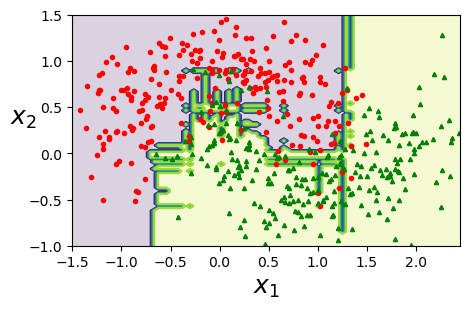

In [21]:
plt.figure(figsize=(5, 3))
plotDecisionBoundary(gbClf, x, y)
plt.show()

In [22]:
#Early Stopping

from sklearn.metrics import accuracy_score

gbClf = GradientBoostingClassifier(n_estimators=120, random_state=1)
gbClf.fit(xTrain, yTrain)

errors = [1 - accuracy_score(yTest, yPred) for yPred in gbClf.staged_predict(xTest)]

bestNEstimators = np.argmin(errors) + 1
bestNEstimators

46

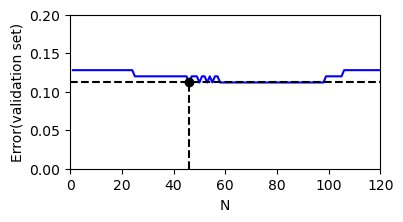

In [23]:
minError = np.min(errors)

plt.figure(figsize=(4, 2))
plt.plot(range(1,121), errors, 'b-')
plt.plot(bestNEstimators, minError, 'ko')
plt.plot([bestNEstimators, bestNEstimators], [0, minError], 'k--')
plt.plot([0, 120], [minError, minError],'k--')
plt.axis([0, 120, 0, .2])
plt.xlabel('N')
plt.ylabel('Error(validation set)')
plt.show()

In [24]:
gbClfBest = GradientBoostingClassifier(n_estimators=bestNEstimators, random_state=1)

gbClfBest.fit(xTrain, yTrain)
gbClfBest.score(xTest, yTest)

0.888

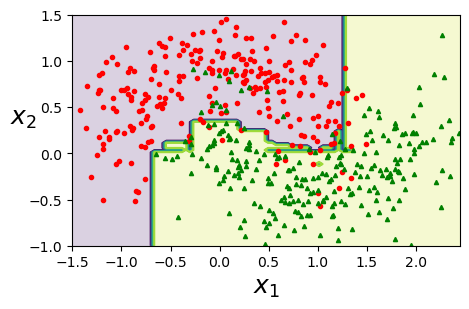

In [25]:
plt.figure(figsize=(5, 3))
plotDecisionBoundary(gbClfBest, x, y)
plt.show()